#=============================
# Task 1: Regression Analysis
#=============================

In [1]:
#STEP 1: Import Required Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
#STEP 2: Load Dataset Properly

column_names = [
    "crim","zn","indus","chas","nox","rm","age",
    "dis","rad","tax","ptratio","b","lstat","medv"
]

df = pd.read_csv("4_house.csv",
                 sep=r"\s+",
                 header=None,
                 names=column_names)

print("Shape:", df.shape)

Shape: (506, 14)


In [3]:
#STEP 3: Define Features (X) and Target (y)

X = df.drop("medv", axis=1)   # All columns except price
y = df["medv"]               # Target variable

In [4]:
#STEP 4: Split Dataset into Training and Testing Sets
#80% training, 20% testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (404, 13)
Testing Set Size: (102, 13)


In [5]:
#STEP 5: Create and Train Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
#STEP 6: Make Predictions

y_pred = model.predict(X_test)

In [7]:
#STEP 7: Evaluate the Model
#🔹 R-squared (R²)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


#👉 R² tells how much variance is explained by the model
#If R² ≈ 0.70 or above → Good model

R-squared: 0.6687594935356289


In [8]:
#Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.29111947497374


In [9]:
#STEP 8: Interpret Coefficients

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)


#🔎 Interpretation:
#=======================
#Positive coefficient → Feature increases house price
#Negative coefficient → Feature decreases house price

#Example:
#RM → usually positive (more rooms → higher price)
#LSTAT → usually negative (higher low-income population → lower price)

    Feature  Coefficient
0      crim    -0.113056
1        zn     0.030110
2     indus     0.040381
3      chas     2.784438
4       nox   -17.202633
5        rm     4.438835
6       age    -0.006296
7       dis    -1.447865
8       rad     0.262430
9       tax    -0.010647
10  ptratio    -0.915456
11        b     0.012351
12    lstat    -0.508571


#===============================
#  Task 2: Time Series Analysis
#===============================

In [10]:
#STEP 1: Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
#STEP 2: Load Dataset

df = pd.read_csv("2_Stock Prices.csv")

print(df.head())
print(df.columns)

  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391
Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='str')


In [12]:
#STEP 3: Convert Date Column to Datetime
#(Important for time series)

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

print(df.head())

           symbol      open      high       low     close    volume
date                                                               
2014-01-02    AAL   25.0700   25.8200   25.0600   25.3600   8998943
2014-01-02   AAPL   79.3828   79.5756   78.8601   79.0185  58791957
2014-01-02    AAP  110.3600  111.8800  109.2900  109.7400    542711
2014-01-02   ABBV   52.1200   52.3300   51.5200   51.9800   4569061
2014-01-02    ABC   70.1100   70.2300   69.4800   69.8900   1148391


In [13]:
#Step 1: Data Preparation
#Converted index to datetime
#Selected single stock (AAPL)
#Sorted data by date

df.index = pd.to_datetime(df.index)
df_aapl = df[df['symbol'] == 'AAPL']
df_aapl = df_aapl.sort_index()

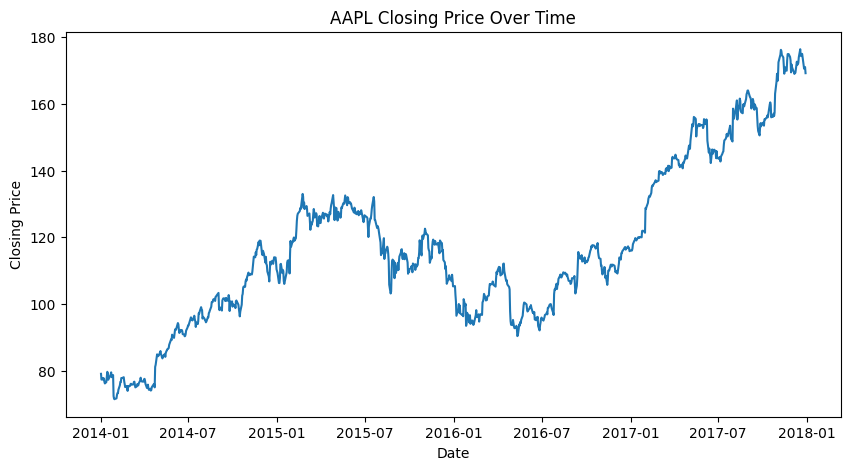

In [14]:
#Step 2: Time Series Plot

plt.figure(figsize=(10,5))
plt.plot(df_aapl['close'])
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


#📌 Observation:
#Clear upward trend visible
#Some short-term fluctuations present

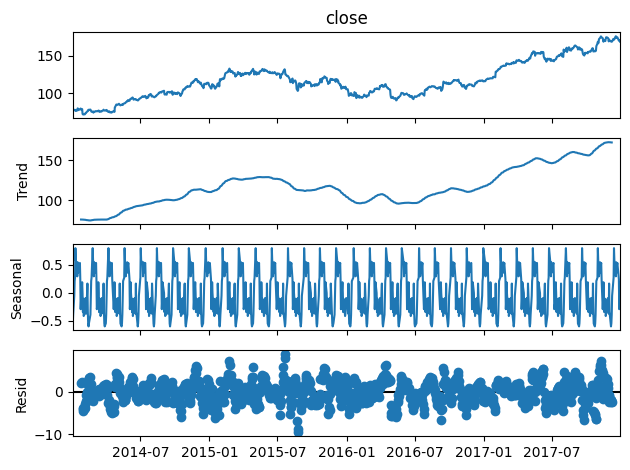

In [15]:
#Step 3: Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(
    df_aapl['close'],
    model='additive',
    period=30
)

decomposition.plot()
plt.show()


#📌 Components:

#1️⃣ Trend → Long-term movement
#2️⃣ Seasonality → Repeating patterns
#3️⃣ Residual → Random noise

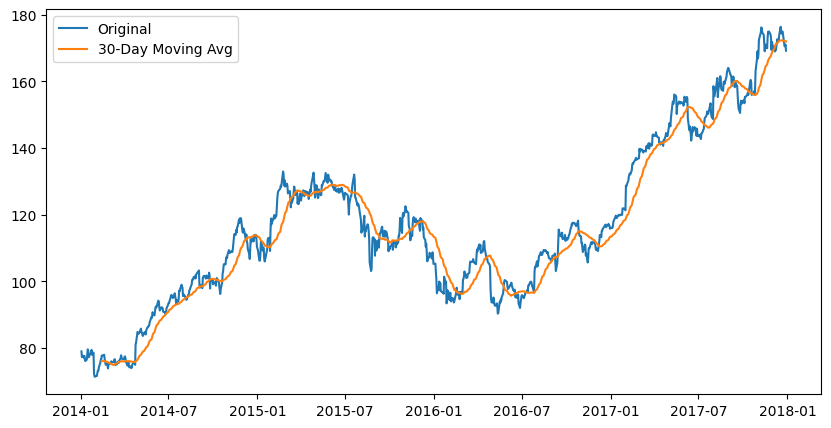

In [16]:
#Step 4: Moving Average Smoothing

df_aapl['moving_avg_30'] = df_aapl['close'].rolling(30).mean()

plt.figure(figsize=(10,5))
plt.plot(df_aapl['close'], label='Original')
plt.plot(df_aapl['moving_avg_30'], label='30-Day Moving Avg')
plt.legend()
plt.show()


#📌 Insight:

#Moving average smooths fluctuations
#Makes trend clearer

#📊 Key Insights

#✔ Stock shows overall increasing trend
#✔ Short-term volatility visible
#✔ Moving average smooths noise
#✔ Decomposition separates trend & seasonality

# ==========================================
#    Task 3: Clustering Analysis (K-Means)
# ==========================================

#🎯 OBJECTIVE

#Standardize dataset
#Apply K-Means clustering
#Find optimal number of clusters (Elbow Method)
#Visualize clusters

#Tools: pandas, sklearn, matplotlib, seaborn

In [17]:
#STEP 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
#STEP 2: Load Dataset

df = pd.read_csv("1_iris.csv")
print(df.head())
print(df.info())

#If species column exists, we will ignore it for clustering.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB
None


In [19]:
#STEP 3: Select Numerical Features Only

X = df.select_dtypes(include=['float64', 'int64'])

In [20]:
#STEP 4: Standardize the Dataset
#Very important for K-Means

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

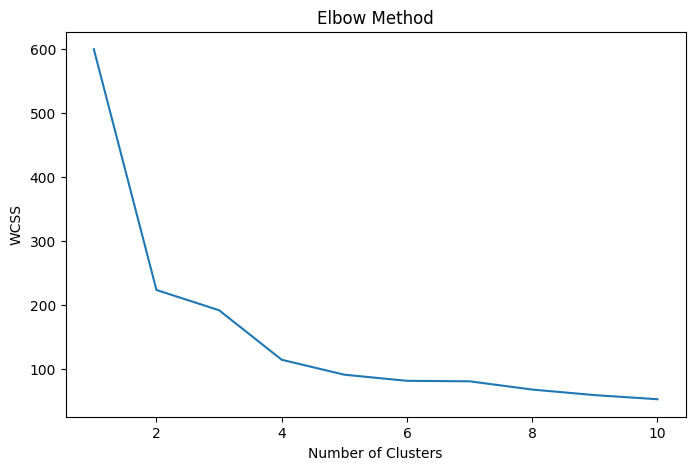

In [21]:
#STEP 5: Find Optimal Number of Clusters (Elbow Method)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


#📌 Observation:-
#Elbow typically appears at k = 3


In [22]:
#STEP 6: Apply K-Means with Optimal Clusters

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

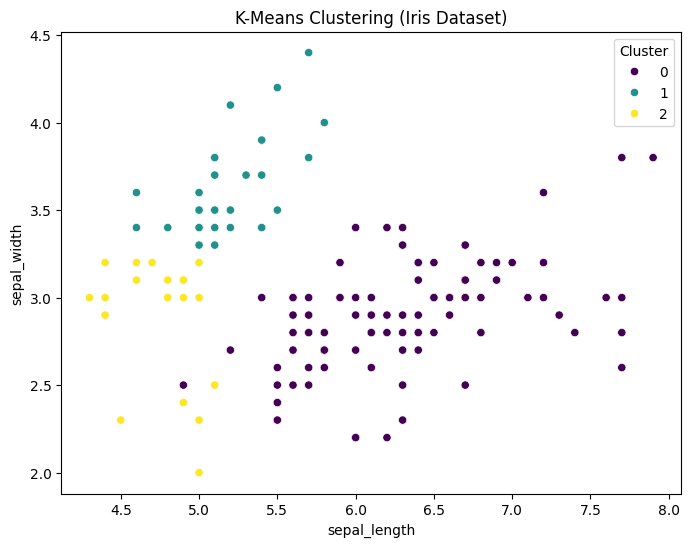

In [23]:
#STEP 7: Visualize Clusters (2D Scatter Plot)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X.iloc[:, 0],
    y=X.iloc[:, 1],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title("K-Means Clustering (Iris Dataset)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

#📊 Interpretation

#✔ Data successfully grouped into 3 clusters
  #✔ Clusters represent similar feature patterns
  #✔ Standardization improved clustering quality